In [ ]:
!pip install -U transformers accelerate datasets bertviz umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 333.2/333.2 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: accelerate
  

In [ ]:
!pip install seaborn --upgrade

ERROR: Operation cancelled by user


In [ ]:
import pandas as pd

data = pd.read_csv("/content/twitter_multi_class_sentiment.csv")

In [ ]:
data.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [ ]:
data.isnull().sum()

,0
text,0
label,0
label_name,0


In [ ]:
data['label'].value_counts()

,count
label,
1,5362
0,4666
3,2159
4,1937
2,1304
5,572


# Data Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Frequency of Classes')

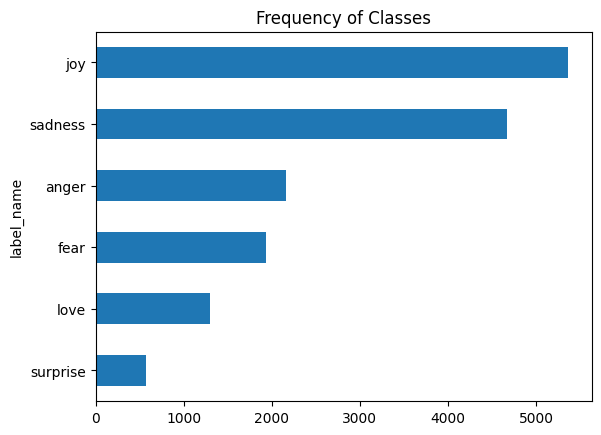

In [ ]:
label_counts = data['label_name'].value_counts(ascending = True)
label_counts.plot.barh()
plt.title("Frequency of Classes")

In [ ]:
data['Words per tweet'] = data['text'].str.split().apply(len)
data['Words per tweet']

,Words per tweet
0,4
1,21
2,10
3,18
4,4
...,...
15995,24
15996,20
15997,6
15998,14


<Axes: title={'center': 'Words per tweet'}, xlabel='label_name'>

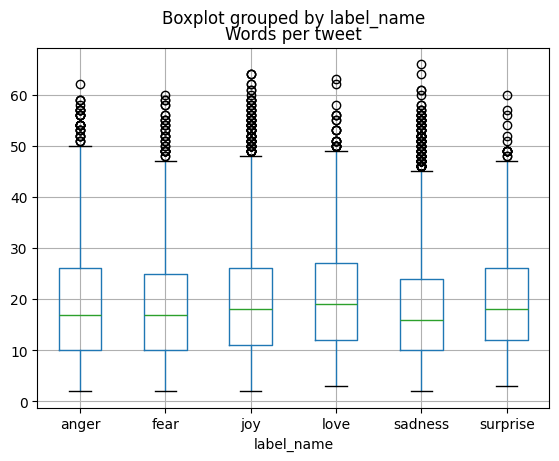

In [ ]:
data.boxplot('Words per tweet', by = 'label_name')

# Tokenization

In [ ]:
from transformers import AutoTokenizer

model_ckpt = 'bert-base-uncased' #uncased : lower and uppercase are considered as single type of data

tokenizer = AutoTokenizer.from_pretrained(model_ckpt)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# check the tokinizer

text = "I love programming! It's my passion."
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 1045, 2293, 4730, 999, 2009, 1005, 1055, 2026, 6896, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
tokenizer.vocab_size ,len(tokenizer.vocab),tokenizer.model_max_length

(30522, 30522, 512)

# DataLoader and Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size = 0.3,stratify = data['label_name'])

In [ ]:
# validation split
test, validation = train_test_split(test,test_size = 1/3,stratify = test['label_name'])

In [ ]:
train.shape,test.shape,validation.shape

((11200, 4), (3200, 4), (1600, 4))

In [ ]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    'train' : Dataset.from_pandas(train,preserve_index = False),
    'test' : Dataset.from_pandas(test,preserve_index = False),
    'validation' : Dataset.from_pandas(validation,preserve_index = False)
})

dataset


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'Words per tweet'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'Words per tweet'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'Words per tweet'],
        num_rows: 1600
    })
})

# Tokenization of Data

In [ ]:
dataset['train'][100]

{'text': 'i feel unsure of my footing',
 'label': 4,
 'label_name': 'fear',
 'Words per tweet': 6}

In [ ]:
def tokenize(batch):
  temp = tokenizer(batch['text'],padding = True, truncation = True)
  return temp

print(tokenize(dataset['train'][0]))

{'input_ids': [101, 1045, 2228, 2049, 2074, 1037, 27952, 13399, 3672, 2055, 2026, 5346, 2875, 5752, 1041, 2290, 6439, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
emotion_encoded = dataset.map(tokenize,batched = True, batch_size = None)

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [ ]:
emotion_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'Words per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'Words per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'Words per tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
})

In [ ]:
#label2id and id2label

label2id = {x['label_name'] : x['label'] for x in dataset['train']}
id2label = {v : k for k,v in label2id.items()}

In [ ]:
label2id

{'sadness': 0, 'joy': 1, 'love': 2, 'fear': 4, 'anger': 3, 'surprise': 5}

In [ ]:
id2label


{0: 'sadness', 1: 'joy', 2: 'love', 4: 'fear', 3: 'anger', 5: 'surprise'}

# Model Building

In [ ]:
from transformers import AutoModel
import torch


In [ ]:
model = AutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

# Loading Model for Sequence Classification

In [ ]:
from transformers import AutoModelForSequenceClassification,AutoConfig

num_labels = len(label2id)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
config = AutoConfig.from_pretrained(model_ckpt,label2id = label2id,id2label = id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,config = config).to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
model.config

BertConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "sadness",
    "1": "joy",
    "2": "love",
    "3": "anger",
    "4": "fear",
    "5": "surprise"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "fear": 4,
    "joy": 1,
    "love": 2,
    "sadness": 0,
    "surprise": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.46.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

# Building Training Arguements

In [ ]:
from transformers import TrainingArguments

batch_size = 64
training_dir = "bert_base_train_dir"

training_args = TrainingArguments(
    output_dir = training_dir,
    overwrite_output_dir = True,
    num_train_epochs = 2,
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    weight_decay = 0.01,
    evaluation_strategy = 'epoch',
    disable_tqdm = False
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1559: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


# Building the compute metrics

In [ ]:
!pip install evaluate

In [ ]:
# use the evaluate library
import evaluate
import numpy as np

accuracy = evaluate.load('accuracy')

def compute_metrics_evaluate(eval_pred):
  predictions,labels = eval_pred
  predictions = np.argmax(predictions,axis = 1)
  return accuracy.compute(predictions = predictions,references = labels)

In [ ]:
# use sklearn to build compute metrics

from sklearn.metrics import accuracy_score,f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)

  f1 = f1_score(labels,preds,average = 'weighted')
  acc = accuracy_score(labels,preds)

  return {'accuracy' : acc,'f1' : f1}

# Build the Trainer and Train the model

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model = model,
    args = training_args,
    compute_metrics = compute_metrics,
    train_dataset = emotion_encoded['train'],
    eval_dataset = emotion_encoded['validation'],
    tokenizer = tokenizer

)

<ipython-input-41-bf0ef915f8d2>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.288350,0.903750,0.904423
2,No log,0.238049,0.912500,0.912981


TrainOutput(global_step=350, training_loss=0.38314836774553573, metrics={'train_runtime': 314.7996, 'train_samples_per_second': 71.156, 'train_steps_per_second': 1.112, 'total_flos': 863364156480000.0, 'train_loss': 0.38314836774553573, 'epoch': 2.0})

# Evaluating on the Test set

In [ ]:
preds_output = trainer.predict(emotion_encoded['test'])
preds_output.metrics

{'test_loss': 0.21411888301372528,
 'test_accuracy': 0.9209375,
 'test_f1': 0.9216619641979371,
 'test_runtime': 17.972,
 'test_samples_per_second': 178.054,
 'test_steps_per_second': 2.782}

In [ ]:
preds_output.predictions

array([[-0.10354627, -1.6775186 , -2.107832  ,  0.30832586,  4.0823503 ,
        -0.44920903],
       [ 4.9778795 , -0.2261425 , -0.44187137, -0.48922548, -0.6990006 ,
        -1.3570853 ],
       [-0.40615484, -1.6666223 , -1.5941331 ,  3.956114  , -0.11365008,
        -1.7714114 ],
       ...,
       [-0.6407467 , -1.5200303 , -0.8209932 ,  4.084155  , -1.0676394 ,
        -1.6249044 ],
       [-1.199644  ,  4.981548  , -0.6032153 , -1.2690119 , -1.8113204 ,
        -1.0311391 ],
       [-0.37057728, -2.3229797 , -2.1957245 ,  0.5051085 ,  4.1826596 ,
         0.0626834 ]], dtype=float32)

In [ ]:
y_pred = np.argmax(preds_output.predictions,axis = 1)
y_true = emotion_encoded['test'][:]['label']

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       933
           1       0.96      0.91      0.93      1072
           2       0.78      0.90      0.84       261
           3       0.93      0.92      0.93       432
           4       0.90      0.87      0.88       387
           5       0.75      0.84      0.80       115

    accuracy                           0.92      3200
   macro avg       0.88      0.90      0.89      3200
weighted avg       0.92      0.92      0.92      3200



# Confusion Matrix

[[904  11   3   8   7   0]
 [ 14 976  62   2   6  12]
 [  3  19 236   3   0   0]
 [ 21   1   1 399  10   0]
 [  9   6   0  17 335  20]
 [  0   4   0   0  14  97]]


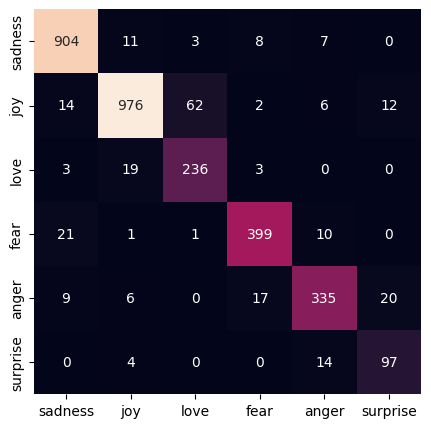

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true,y_pred)
print(cm)

plt.figure(figsize = (5,5))
sns.heatmap(cm,annot=True,xticklabels=label2id.keys(),yticklabels=label2id.keys(),fmt = 'd',cbar = False)
plt.show()



In [ ]:
text = "I am super happy today. I got it done. Finally!"

def get_prediction(text):
    input_encoded = tokenizer(text,return_tensors = 'pt').to(device)
    input_encoded

    with torch.no_grad():
      outputs = model(**input_encoded)

    logits = outputs.logits
    pred = torch.argmax(logits,dim=1).item()
    return pred, id2label[pred]

In [ ]:
logits

tensor([[-0.8659,  5.0935,  0.0836, -1.3980, -1.9480, -1.0270]],
       device='cuda:0')

# Saving the model

In [ ]:
trainer.save_model('bert_base_model_sentiment_classification')

In [ ]:
 !zip -r bert_base_model_sentiment_classification.zip . -i content/bert_base_model_sentiment_classification

	zip warning: zip file empty


In [ ]:
# zip the model file
!zip -r bert_sentiment_model.zip . -i content/bert_base_model_sentiment_classification


	zip warning: zip file empty


In [ ]:
model = AutoModelForSequenceClassification.from_pretrained('bert_base_model_sentiment_classification')
tokenizer = AutoTokenizer.from_pretrained('bert_base_model_sentiment_classification')

In [ ]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: write).
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in 

In [ ]:
!pip install  -U huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 11.8 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [ ]:
from huggingface_hub import push_to_hub



